In [8]:
using ElasticityAD, Statistics, LinearAlgebra

## Strain stiffening of a cytoskeletal network

In [3]:
cyto_net = load_network("../data/threshold0x001_conc0.5_maxrl3_epsilon0x05_17500.jld2")
cyto_net.points

3×1359 Matrix{Float64}:
 0.442969  0.906131  0.756105  0.932601  …  0.115395  0.384392  0.56442
 0.119794  0.124813  0.887844  0.262796     0.301546  0.555719  0.675178
 0.720869  0.497534  0.332571  0.842789     0.229909  0.150017  0.163738

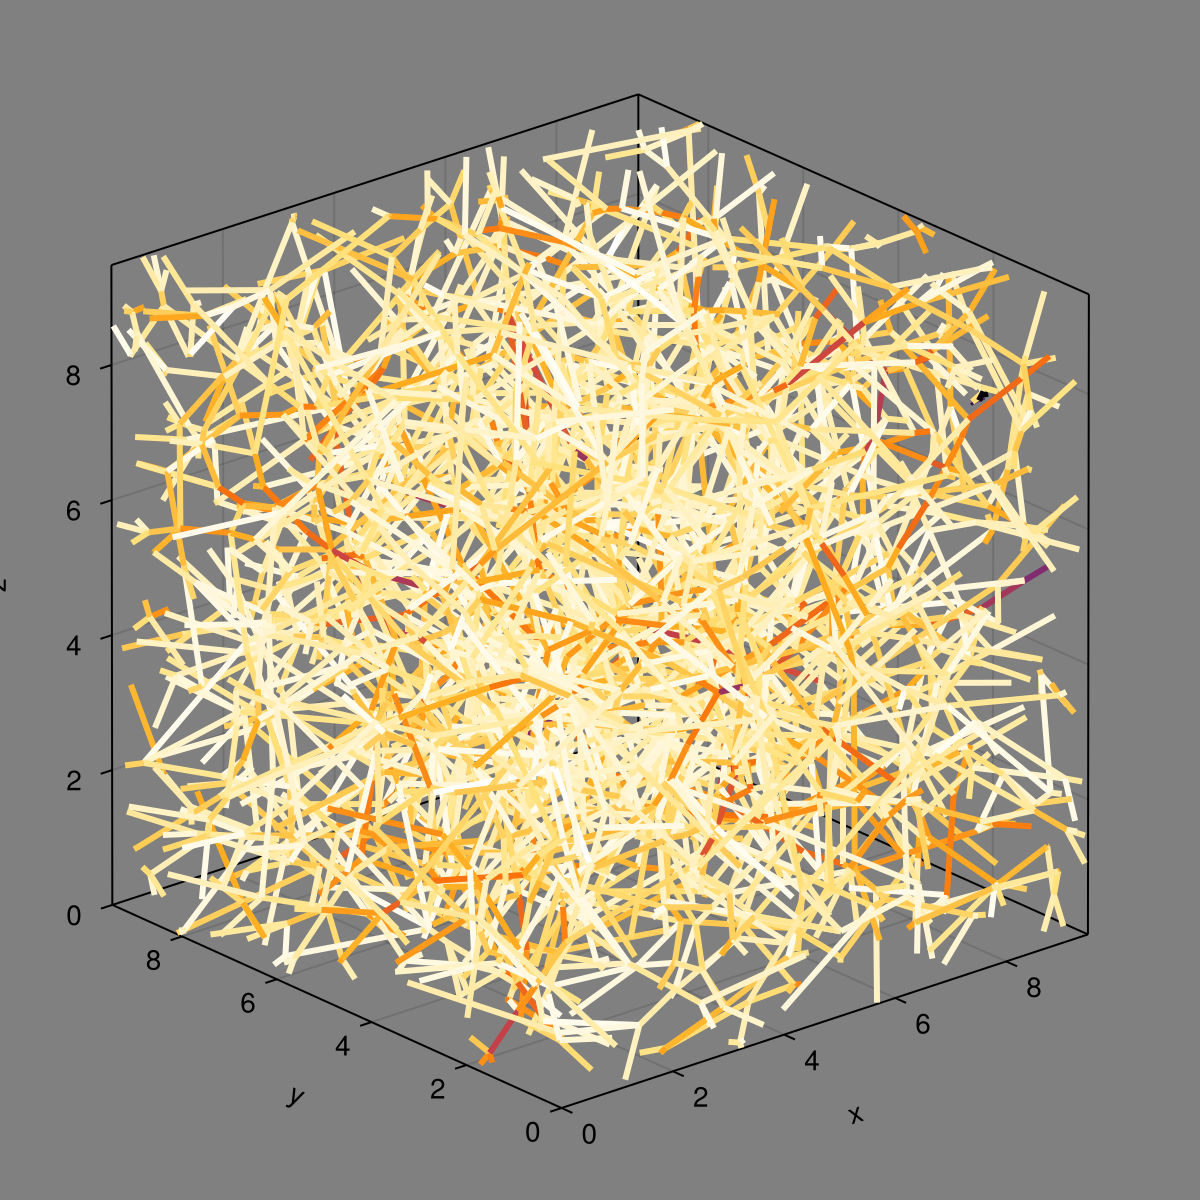

In [3]:
visualize_net(cyto_net)

In [4]:
mean(ElasticityAD.tensions(cyto_net))

0.008133850101248388

In [5]:
moduli(cyto_net) #this takEs about 40 seconds

B = 0.28269569429851776 
 G = 0.026874514393417252 
 c1111 = 0.3526109201439431 
 c2222 = 0.317510384533873 
 c3333 = 0.2866431813566683 
 c1212 = 0.026659515851404265 
 c1313 = 0.028182678839586056 
 c2323 = 0.025191675706630532 
 c1122 = 0.278453915746671 
 c1133 = 0.2666222905934444 
 c2233 = 0.24867217498597272


(0.28269569429851776, 0.026874514393417252, 0.3526109201439431, 0.317510384533873, 0.2866431813566683, 0.026659515851404265, 0.028182678839586056, 0.025191675706630532, 0.278453915746671, 0.2666222905934444, 0.24867217498597272)

In [5]:
cyto_net_dilated = deepcopy(cyto_net)
cyto_net_dilated.basis[1, 1] *= 1.1 #apply uniaxial strain

10.424263041710232

In [6]:
moduli(cyto_net_dilated)

B = 0.31369520957503727 
 G = 0.0829789160239432 
 c1111 = 0.63956119212454 
 c2222 = 0.336775438515104 
 c3333 = 0.31619903024201723 
 c1212 = 0.08553138563994878 
 c1313 = 0.0901364267278055 
 c2323 = 0.06350175167368691 
 c1122 = 0.28770479874254673 
 c1133 = 0.2827429524425115 
 c2233 = 0.19491286146177889


(0.31369520957503727, 0.0829789160239432, 0.63956119212454, 0.336775438515104, 0.31619903024201723, 0.08553138563994878, 0.0901364267278055, 0.06350175167368691, 0.28770479874254673, 0.2827429524425115, 0.19491286146177889)

Note that $G$ has increased 3-fold with just a 10% strain!

In [9]:
cyto_net_sheared = deepcopy(cyto_net)
cyto_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cyto_net_sheared)

B = 0.2609951004182405 
 G = 0.05430485674194841 
 c1111 = 0.36099807823842367 
 c2222 = 0.33547040495003105 
 c3333 = 0.26944384854701575 
 c1212 = 0.09030958382193531 
 c1313 = 0.046544244348847685 
 c2323 = 0.043206940298584504 
 c1122 = 0.25713204426569114 
 c1133 = 0.22220545000523922 
 c2233 = 0.21218429174341658


(0.2609951004182405, 0.05430485674194841, 0.36099807823842367, 0.33547040495003105, 0.26944384854701575, 0.09030958382193531, 0.046544244348847685, 0.043206940298584504, 0.25713204426569114, 0.22220545000523922, 0.21218429174341658)

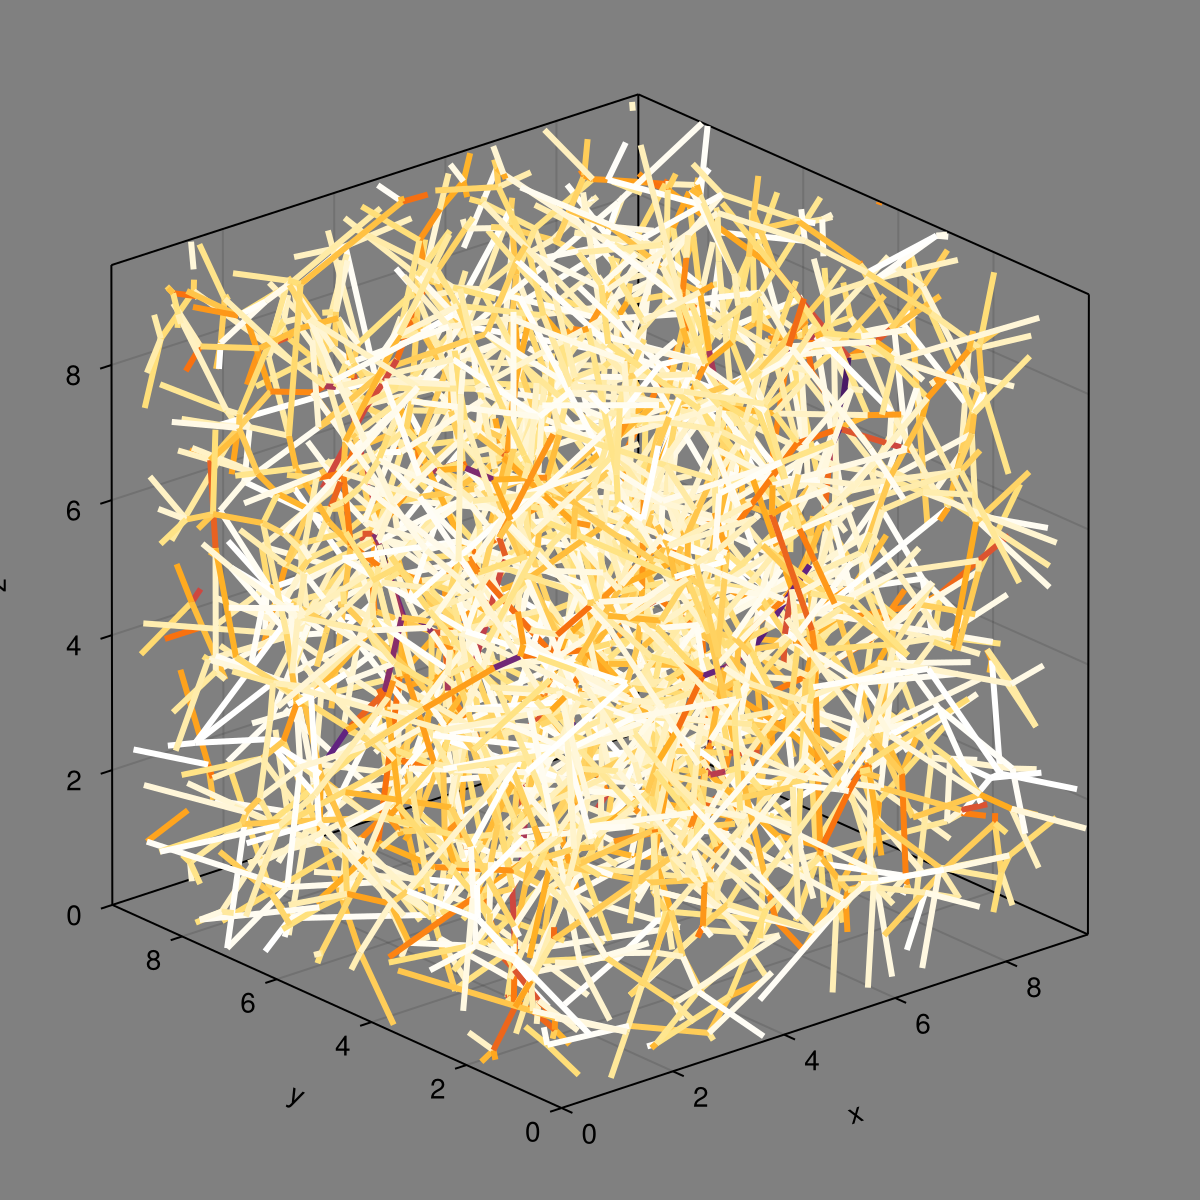

In [11]:
visualize_net(cyto_net_sheared)

## What about a cubic network that does not have tensional rigidity?

In [12]:
cube_net = cubic_network(10, 10)
moduli(cube_net)
cube_net_dilated = deepcopy(cube_net)
cube_net_dilated.basis[1, 1] *= 1.1
moduli(cube_net_dilated)
cube_net_sheared = deepcopy(cube_net)
cube_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cube_net_sheared)

B = 0.3333333333333333 
 G = 0.2 
 c1111 = 1.0 
 c2222 = 1.0 
 c3333 = 1.0 
 c1212 = 0.0 
 c1313 = 0.0 
 c2323 = 0.0 
 c1122 = 0.0 
 c1133 = 0.0 
 c2233 = 0.0
B = 0.3242424242424274 
 G = 0.2045454545454551 
 c1111 = 1.1000000000000156 
 c2222 = 0.9090909090909091 
 c3333 = 0.9090909090909091 
 c1212 = 0.024999999999999866 
 c1313 = 0.024999999999999866 
 c2323 = 2.5232341468787135e-18 
 c1122 = 3.1086244689504383e-15 
 c1133 = 3.1086244689504383e-15 
 c2233 = 0.0
B = 0.3389190724377206 
 G = 0.20438797050542543 
 c1111 = 1.0002992866236362 
 c2222 = 1.0002997923896 
 c3333 = 1.0100975230594151 
 c1212 = 0.022434269203587907 
 c1313 = 0.0012680892426012278 
 c2323 = 0.0012678017011930481 
 c1122 = 0.01990400594949482 
 c1133 = 5.252659950549798e-6 
 c2233 = -0.00012173367602819063


(0.3389190724377206, 0.20438797050542543, 1.0002992866236362, 1.0002997923896, 1.0100975230594151, 0.022434269203587907, 0.0012680892426012278, 0.0012678017011930481, 0.01990400594949482, 5.252659950549798e-6, -0.00012173367602819063)

## What about a diamond network with the same prestrain?

In [13]:
println("diamond:")
diamond_net = diamond1000(9.4766, 0.0081)
moduli(diamond_net)
println("dilated diamond:")
diamond_net_dilated = deepcopy(diamond_net)
diamond_net_dilated.basis[1, 1] *= 1.1
moduli(diamond_net_dilated)
println("sheared diamond:")
diamond_net_sheared = deepcopy(diamond_net)
diamond_net_sheared.basis *= ([0 0.1 0; 0.1 0 0; 0 0 0] + I)
moduli(cube_net_sheared)

diamond:
B = 0.21603127713459339 
 G = 0.005653995850661213 
 c1111 = 0.21950286397080312 
 c2222 = 0.21950286397080312 
 c3333 = 0.2195028639708031 
 c1212 = 0.007687532999663846 
 c1313 = 0.007687532999663829 
 c2323 = 0.0076875329996638365 
 c1122 = 0.21429548371648857 
 c1133 = 0.2142954837164885 
 c2233 = 0.2142954837164886
dilated diamond:
B = 0.2101395150309115 
 G = 0.0273269051784048 
 c1111 = 0.2869518315515147 
 c2222 = 0.20018755069197094 
 c3333 = 0.20018755069197094 
 c1212 = 0.039075331012213554 
 c1313 = 0.0390753310122135 
 c2323 = 0.03002966994623593 
 c1122 = 0.2129756914963029 
 c1133 = 0.2129756914963029 
 c2233 = 0.1760129681787677
sheared diamond:
B = 0.3389190724377206 
 G = 0.20438797050542543 
 c1111 = 1.0002992866236362 
 c2222 = 1.0002997923896 
 c3333 = 1.0100975230594151 
 c1212 = 0.022434269203587907 
 c1313 = 0.0012680892426012278 
 c2323 = 0.0012678017011930481 
 c1122 = 0.01990400594949482 
 c1133 = 5.252659950549798e-6 
 c2233 = -0.0001217336760281906

(0.3389190724377206, 0.20438797050542543, 1.0002992866236362, 1.0002997923896, 1.0100975230594151, 0.022434269203587907, 0.0012680892426012278, 0.0012678017011930481, 0.01990400594949482, 5.252659950549798e-6, -0.00012173367602819063)

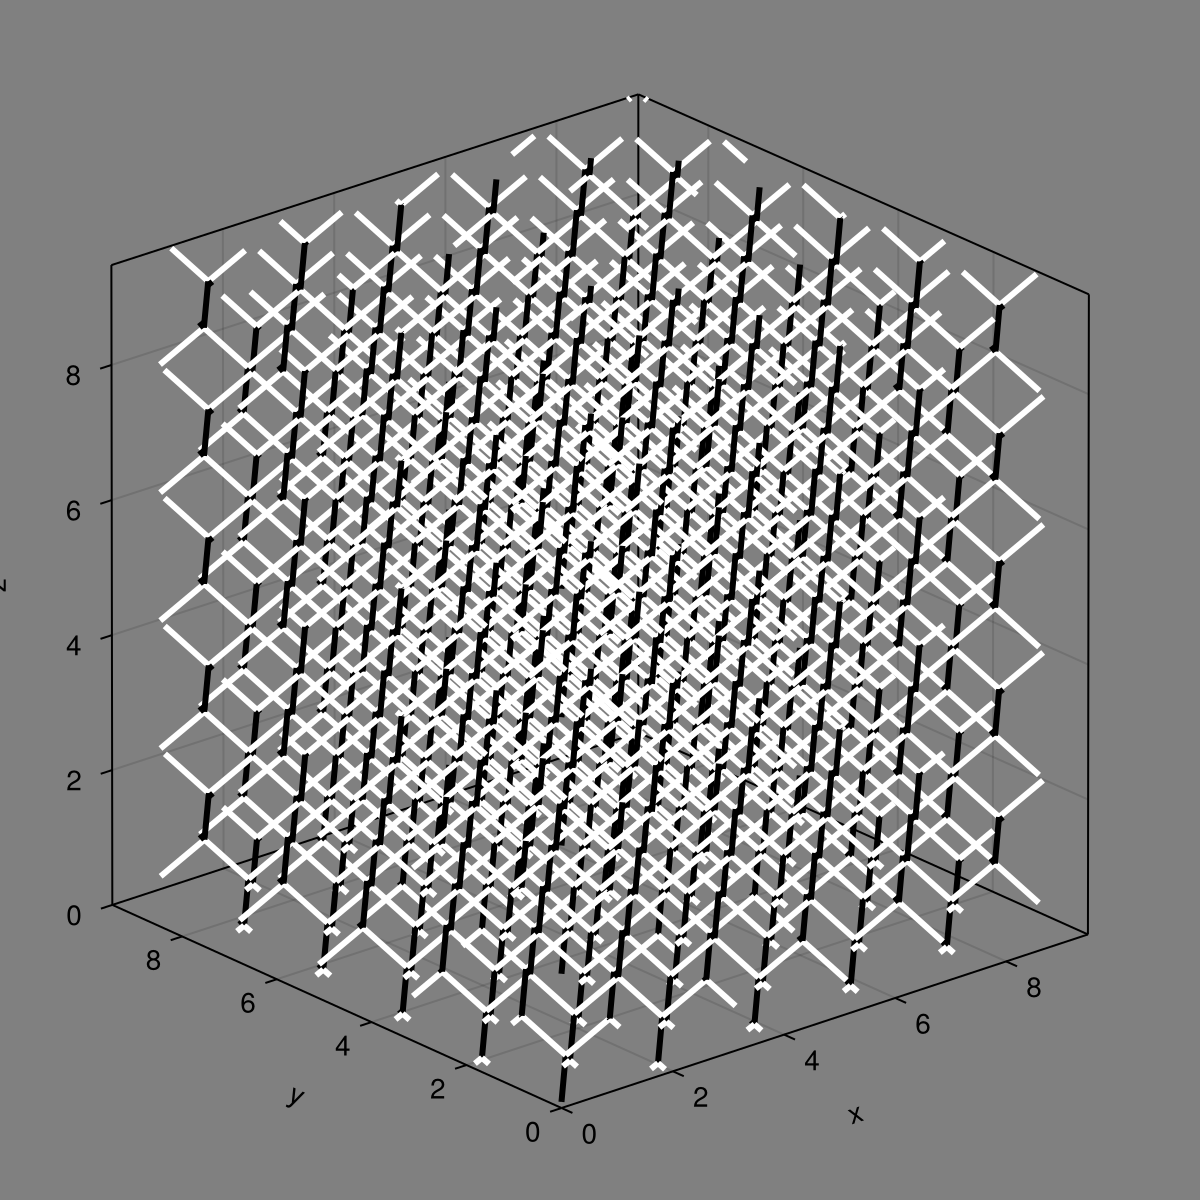

In [15]:
relax!(diamond_net_sheared)
visualize_net(diamond_net_sheared)

## What about a Erdos-Renyi network with random node positions?

In [7]:
ern = er(9.4766, rand(3, 1359), 4.0, 0.2)

Network(Graphs.SimpleGraphs.SimpleGraph{Int64}(1741, [[70, 73, 480, 807, 1112, 1144], [452, 873], Int64[], [246], [9, 777, 1074], [236, 1138], [329, 516, 638, 806], [1142], [5], [593, 1208]  …  [191, 312], [98, 321, 561, 780, 1065], [327, 437, 616, 920], [57, 63], [66, 222], [405, 663], Int64[], [865, 1261], [1056], [156, 302, 369]]), [9.4766 0.0 0.0; 0.0 9.4766 0.0; 0.0 0.0 9.4766], [0.25925326753118993 0.9851013444524216 … 0.8529650779107677 0.6645271143860603; 0.5962207834519484 0.3235995645721682 … 0.3739133289079639 0.7749495136036526; 0.4762307370346742 0.714345540014557 … 0.26651005515737825 0.6297600113514914], Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64}(Edge 18 => 414 => 3.201735341148679, Edge 871 => 956 => 3.1752942683908576, Edge 483 => 660 => 3.1963704735535314, Edge 240 => 1250 => 4.343244414271642, Edge 199 => 849 => 4.261285637913612, Edge 27 => 34 => 3.5868508750425594, Edge 274 => 912 => 2.1798871659775534, Edge 869 => 1261 => 3.573922954853108, Edge 477 => 9

In [8]:
relax!(ern, show_trace = true)

Iter     Function value   Gradient norm 
     0     1.836480e+02     1.090064e+01
 * time: 0.0
     1     1.065877e+01     1.682576e+00
 * time: 0.3899998664855957
     2     1.064157e+01     1.682527e+00
 * time: 0.8309998512268066
     3     1.061484e+01     1.674675e+00
 * time: 1.5449998378753662
     4     1.059303e+01     1.674389e+00
 * time: 1.8929998874664307
     5     1.055896e+01     1.673895e+00
 * time: 2.235999822616577
     6     1.053250e+01     1.673133e+00
 * time: 2.5749998092651367
     7     1.046539e+01     1.660927e+00
 * time: 2.929999828338623
     8     1.042113e+01     1.659405e+00
 * time: 3.2939999103546143
     9     1.041904e+01     1.659403e+00
 * time: 3.6559998989105225
    10     1.037368e+01     1.659257e+00
 * time: 4.0289998054504395
    11     1.035339e+01     1.658776e+00
 * time: 4.4049999713897705
    12     1.031763e+01     1.658565e+00
 * time: 4.760999917984009
    13     1.024426e+01     1.650366e+00
 * time: 5.125999927520752
    14     1

3×1359 Matrix{Float64}:
 0.384434  0.665585  0.519913  1.51236   …  0.823481  0.849732  0.668585
 0.733487  0.391043  0.558655  0.906855     1.18238   0.338039  0.773686
 0.57641   0.692282  0.335357  0.85012      0.713986  0.362249  0.630159

In [15]:
for e in eachindex(ern.rest_lengths)
    ern.rest_lengths[e] *= 1.05
end
relax!(ern, show_trace = true)

Iter     Function value   Gradient norm 
     0     6.774760e+00     1.766159e+00
 * time: 0.0
     1     6.752699e+00     1.765355e+00
 * time: 0.39299988746643066
     2     6.726862e+00     1.760532e+00
 * time: 1.0889999866485596
     3     6.685792e+00     1.761209e+00
 * time: 1.4709999561309814
     4     6.680062e+00     1.750638e+00
 * time: 1.7939999103546143
     5     6.676270e+00     1.750967e+00
 * time: 2.119999885559082
     6     6.668555e+00     1.744255e+00
 * time: 2.4560000896453857
     7     6.638597e+00     1.727650e+00
 * time: 2.7779998779296875
     8     6.593760e+00     1.707952e+00
 * time: 3.0969998836517334
     9     6.560470e+00     1.684590e+00
 * time: 3.428999900817871
    10     6.531232e+00     1.664542e+00
 * time: 3.76200008392334
    11     6.499475e+00     1.648931e+00
 * time: 4.08299994468689
    12     6.472871e+00     1.646214e+00
 * time: 4.425999879837036
    13     6.433723e+00     1.633914e+00
 * time: 4.787999868392944
    14     6.40

3×1359 Matrix{Float64}:
 0.519339  0.665795  0.519913  1.71379   …  0.7967    0.873315  0.667687
 0.505139  0.211162  0.558655  0.859811     1.06173   0.303519  0.774145
 0.628916  0.560328  0.335357  0.718592     0.643265  0.339998  0.629705

In [16]:
mean(ElasticityAD.tensions(ern))

0.009159180117605657

In [19]:
erncopy = deepcopy(ern)
simplify_net!(erncopy)

In [20]:
moduli(erncopy)

B = 0.13010995638348782 
 G = 0.03406808781405236 
 c1111 = 0.16682176211084324 
 c2222 = 0.1542109078646383 
 c3333 = 0.18939969911307977 
 c1212 = 0.03596386949088575 
 c1313 = 0.039612168849792156 
 c2323 = 0.03471315076053501 
 c1122 = 0.10853285063561968 
 c1133 = 0.11289780813081571 
 c2233 = 0.1088479604149793


(0.13010995638348782, 0.03406808781405236, 0.16682176211084324, 0.1542109078646383, 0.18939969911307977, 0.03596386949088575, 0.039612168849792156, 0.03471315076053501, 0.10853285063561968, 0.11289780813081571, 0.1088479604149793)

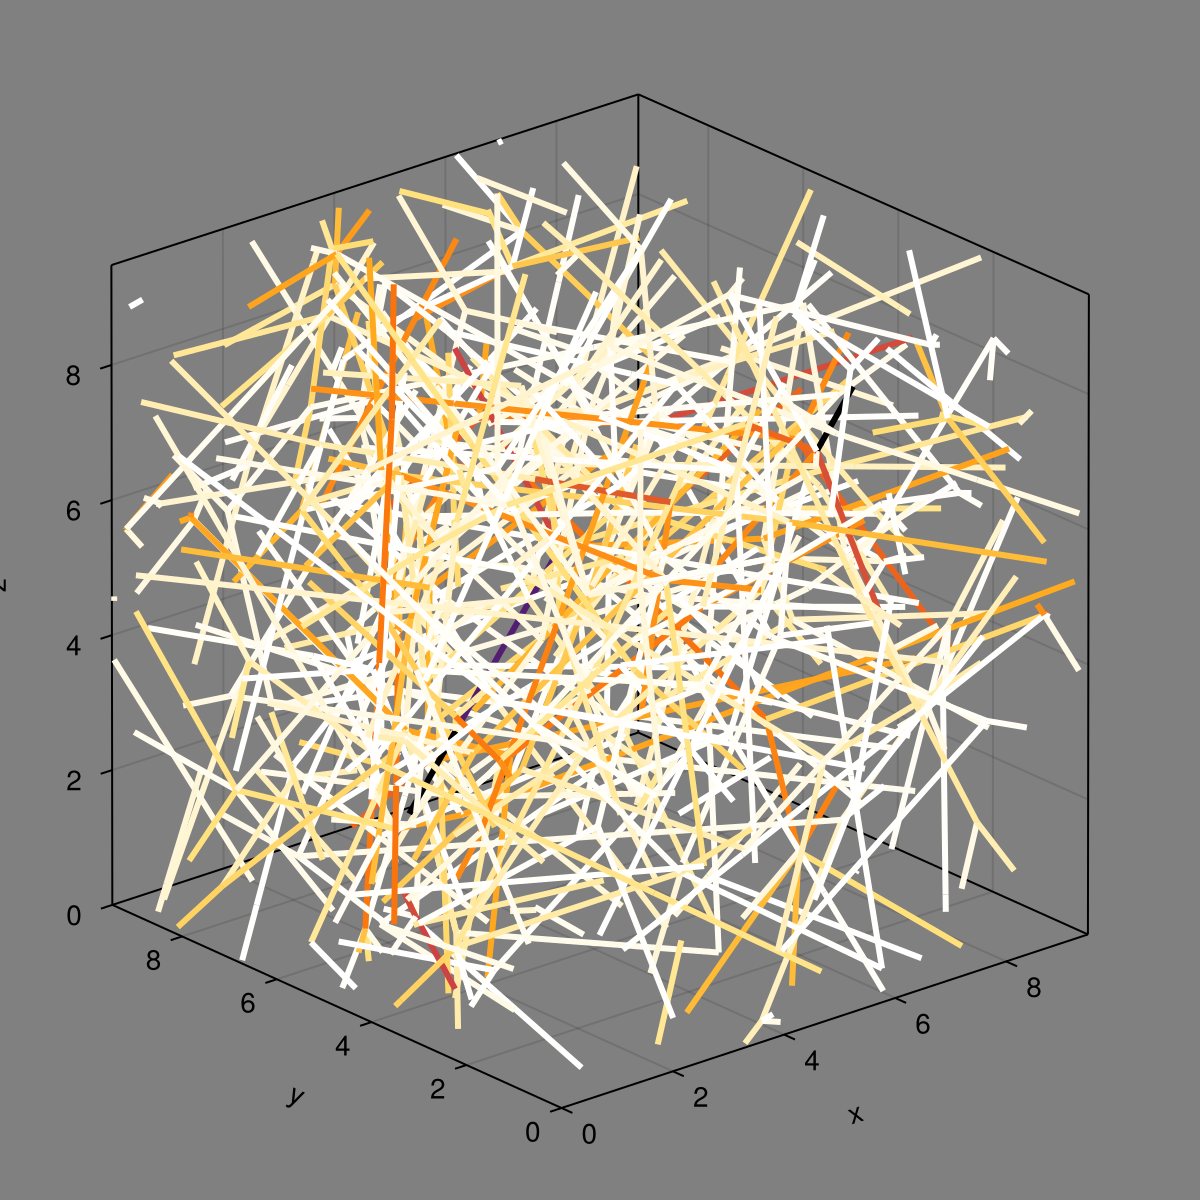

In [21]:
visualize_net(erncopy)

In [22]:
erncopy.g

{466, 706} undirected simple Int64 graph

In [24]:
erncopy.basis[1, 1] *= 1.1

10.42426

In [25]:
moduli(erncopy)

B = 0.15541892679687996 
 G = 0.04888520765333186 
 c1111 = 0.2843046160807276 
 c2222 = 0.16503964555065734 
 c3333 = 0.1949040400120464 
 c1212 = 0.05317207859081996 
 c1313 = 0.05842894186031533 
 c2323 = 0.04382925718912837 
 c1122 = 0.13403083389186476 
 c1133 = 0.1396380226910034 
 c2233 = 0.10359216318137598


(0.15541892679687996, 0.04888520765333186, 0.2843046160807276, 0.16503964555065734, 0.1949040400120464, 0.05317207859081996, 0.05842894186031533, 0.04382925718912837, 0.13403083389186476, 0.1396380226910034, 0.10359216318137598)